# Import package and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
abalone_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')

## Data Description

Sex: Sex (M: Male, F: Female, I: Infant)

Length: Longest Shell measurement (millimetres - mm)

Diameter: Diameter - perpendicular to length (mm)

Height: Height - with meat in shell (mm)

Whole weight: Weight of whole abalone (grams)

Shucked weight: Weight of meat (grams)

Viscera weight: Gut weight after bleeding (grams)

Shell weight: Shell weight - after being dried (grams)

Rings: Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [3]:
abalone_data.head() 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


In [4]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


# Exploratory Data Analysis

The abalone data above consist of categorical and numerical data. The sex column is a categorical data while the other columns are numerical. 
We will categorize the numerical data by the size, weight, and age attributes. Size attributes contain columns that shows dimensions of abalone, weight attributes shows the weight of abalone with different angle for each columns, and age attributes contain rings column which shows the age of abalone. 
As of the categorical data of sex column will be covered after we analyze the numerical.

## 1. Size
(Length, Diameter, and Height)

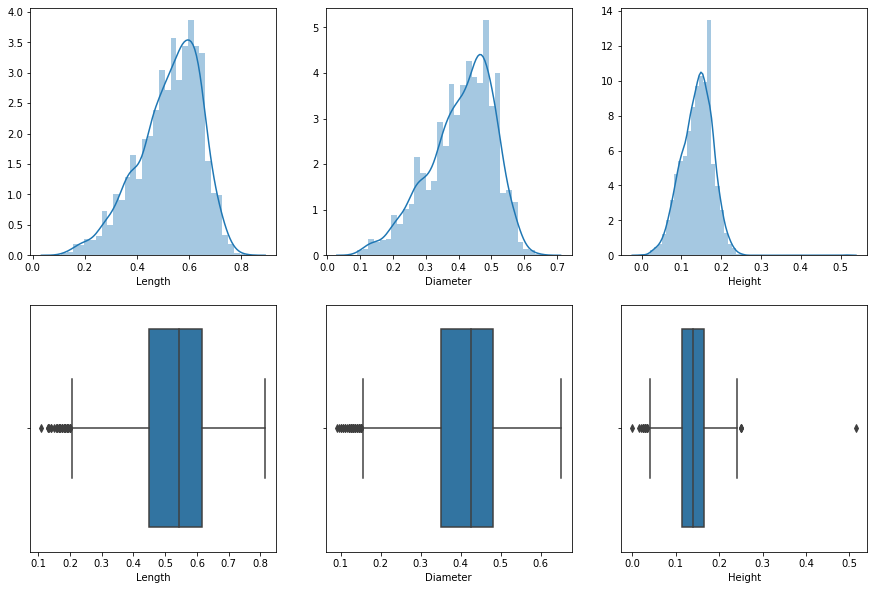

In [5]:
rows = 2
cols = 3
i = 0
size_att = ['Length', 'Diameter', 'Height']

plt.figure(figsize=(cols * 5, rows * 5))

for var in size_att:
    i+= 1
    plt.subplot(rows, cols, i)
    _ = sns.distplot(abalone_data[var])
    
    plt.subplot(rows, cols, i+cols)
    _ = sns.boxplot(abalone_data[var])

As we can see there is an outlier on the height data, to observe more of the data we can plot the same chart with excluding the outlier.

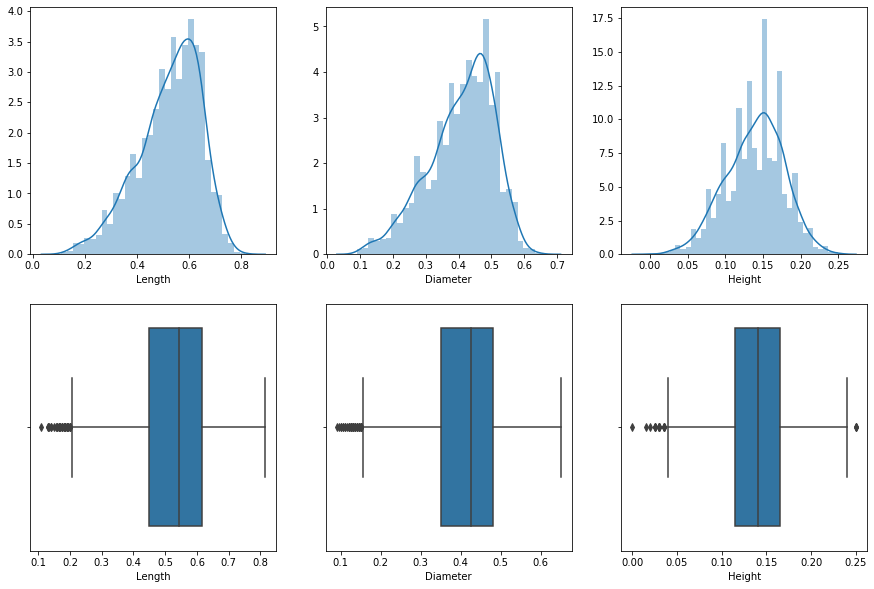

In [6]:
abalone_data = abalone_data[abalone_data.Height < 0.4]

rows = 2
cols = 3
i = 0
size_att = ['Length', 'Diameter', 'Height']

plt.figure(figsize=(cols * 5, rows * 5))

for var in size_att:
    i+= 1
    plt.subplot(rows, cols, i)
    _ = sns.distplot(abalone_data[var])
    
    plt.subplot(rows, cols, i+cols)
    _ = sns.boxplot(abalone_data[var])

The distribution of size data is about the same for each other. 

## 2. Weight

(Whole weight, Shucked weight,	Viscera weight,	and Shell weight)

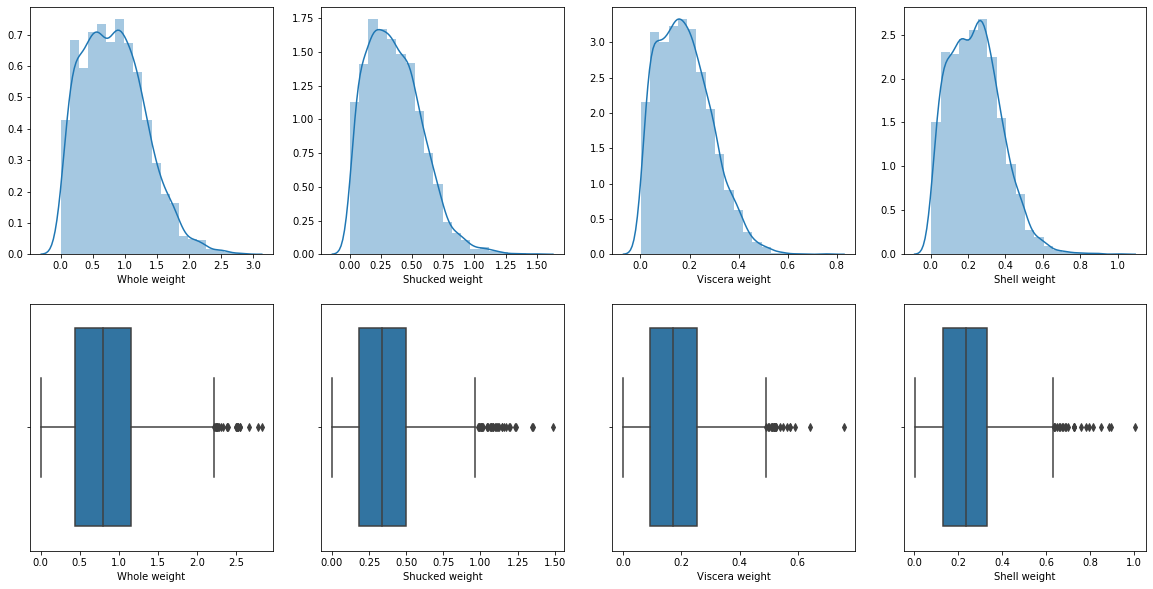

In [7]:
rows = 2
cols = 4
i = 0
weight_att = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

plt.figure(figsize=(cols * 5, rows * 5))

for var in weight_att:
    i += 1
    plt.subplot(rows, cols, i)
    _ = sns.distplot(abalone_data[var], bins=20)

    plt.subplot(rows, cols, i+cols)
    _ = sns.boxplot(abalone_data[var])

The weight data shows different distribution from the size data. This attributes show a bit of positive skewness.

## 3. Age
(Rings)

count    3131.000000
mean        9.947940
std         3.230768
min         2.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

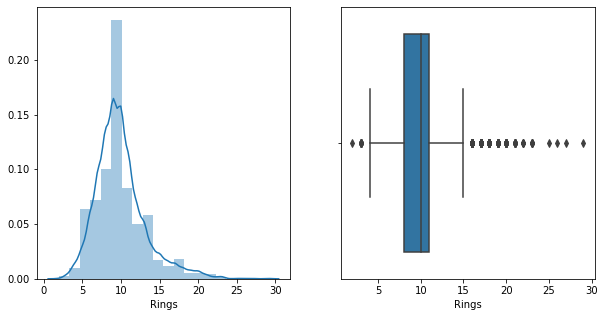

In [8]:
rows = 1
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Rings'], bins=20)

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_data['Rings'])

abalone_data['Rings'].describe()

The values of rings concentrated near the median with the value of 1st and 3rd quartiles of the data in a range less than the standard deviation. The range of the rings is from 1 to 29. 

## Checking relation from each numerical column

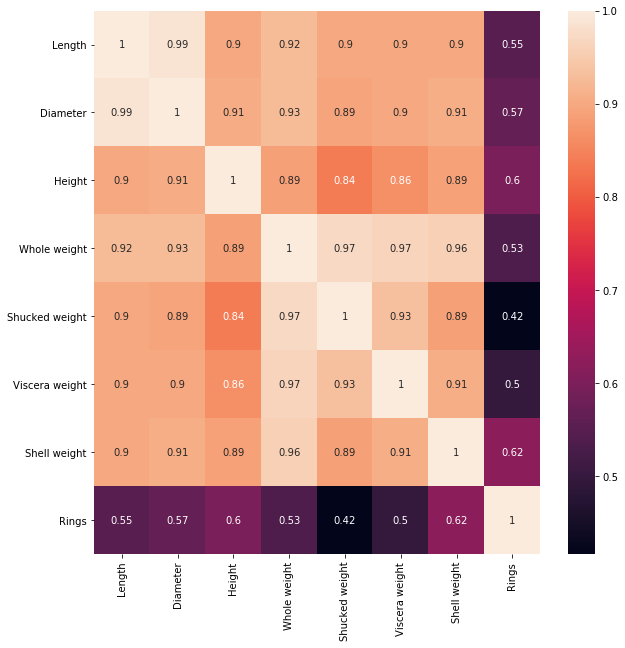

In [9]:
plt.figure(figsize=(10, 10))
_ = sns.heatmap(abalone_data.corr(), annot=True)

The shell weight column has the biggest correlation with the rings column, followed by height column. Thus we will see these two columns first

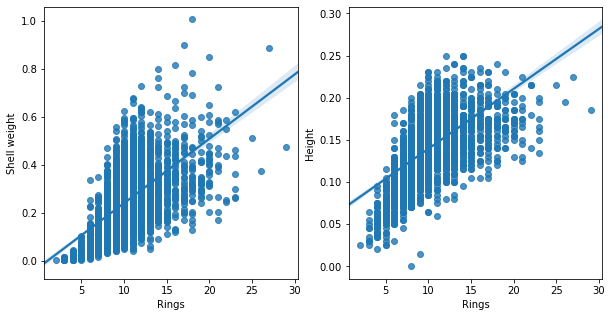

In [10]:
rows = 1
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
_ = sns.regplot(x = abalone_data['Rings'], y = abalone_data['Shell weight'])

i += 1
plt.subplot(rows, cols, i)
_ = sns.regplot(x = abalone_data['Rings'], y = abalone_data['Height'])

The younger abalone which shown by the lower rings amount have concentrated value of height and shell weight. The case is difference for the older abalone, in this case the shell weight and height value become more disperse (scatterplot area become larger). 
So with that we continue the analysis of the data by separating the data, we separate them base on rings amount. The young abalone which has 10 rings below and the old abalone with more than 10 rings. The treshold was taken from the median of the rings.

In [11]:
young_abalone = abalone_data[abalone_data['Rings'] <= 10]
old_abalone = abalone_data[abalone_data['Rings'] > 10]

### Young abalone analysis

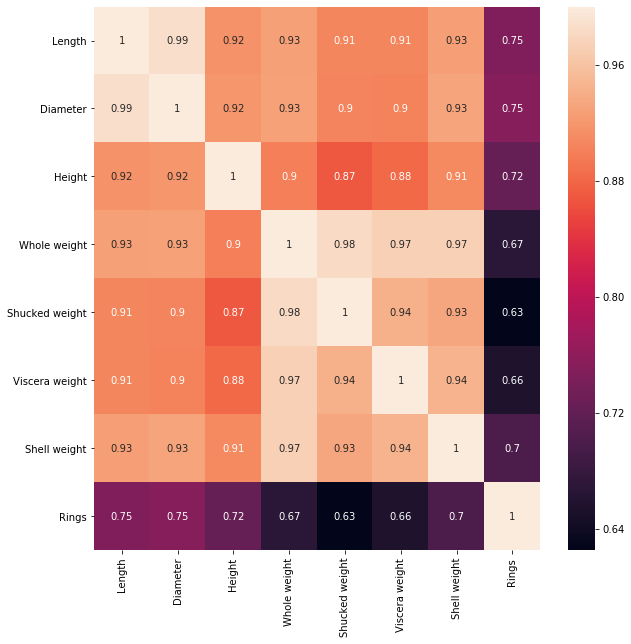

In [12]:
plt.figure(figsize=(10, 10))
_ = sns.heatmap(young_abalone.corr(), annot=True)

The heatmap shows that the correlation between each column to rings column increasing for the young abalone, especially on size attributes which become the three highest columns that correlated with rings column. This can be seen more by charts below.

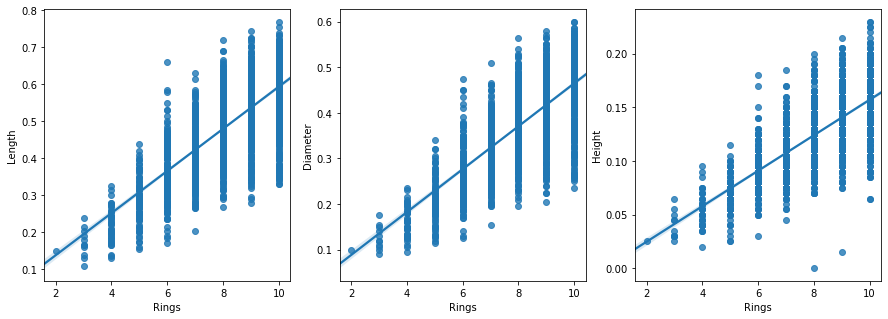

In [13]:
rows = 1
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in size_att:
    i += 1
    plt.subplot(rows, cols, i)
    sns.regplot(x = young_abalone['Rings'], y = young_abalone[var])

And the same pattern is shown by the weight attributes. 

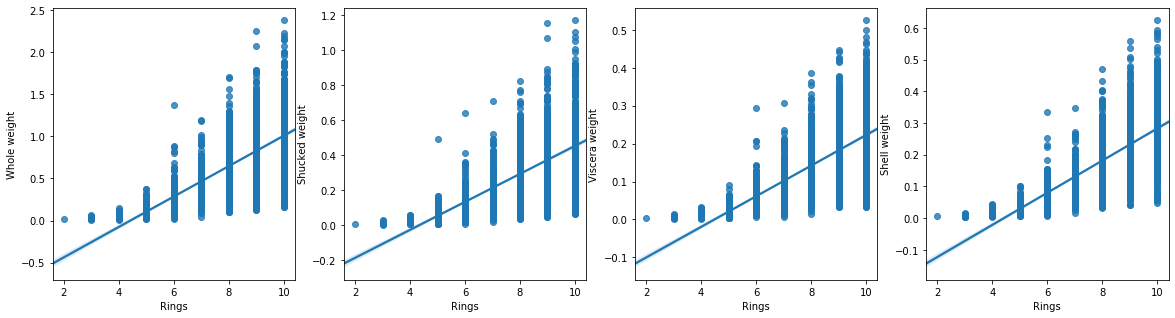

In [14]:
rows = 1
cols = 4
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in weight_att:
    i += 1
    plt.subplot(rows, cols, i)
    sns.regplot(x = young_abalone['Rings'], y = young_abalone[var])

### Old abalone analysis
If we considerate the old abalone into account, the data that disperse makes the correlation almost reach zero value.

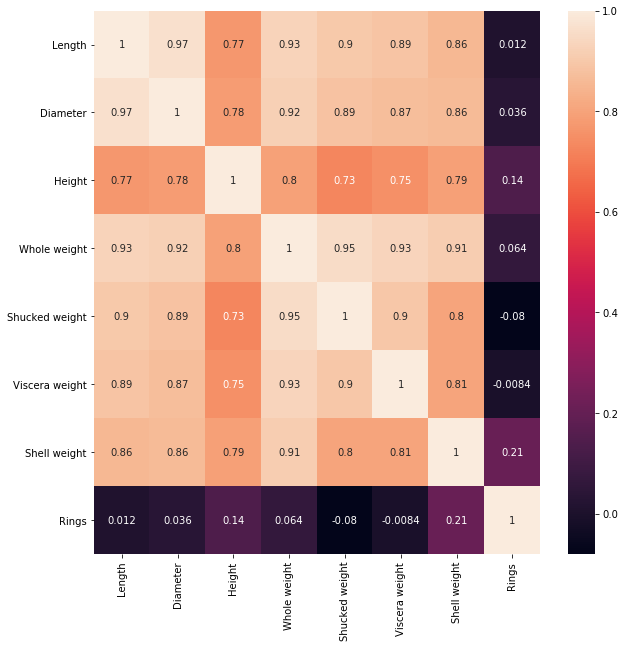

In [15]:
plt.figure(figsize=(10, 10))
_ = sns.heatmap(old_abalone.corr(), annot=True)

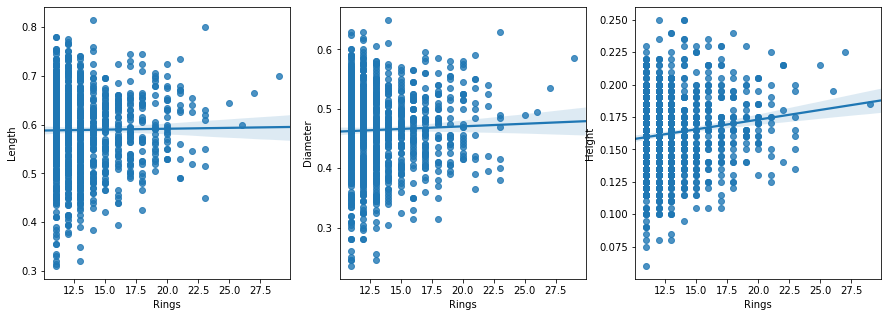

In [16]:
rows = 1
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in size_att:
    i += 1
    plt.subplot(rows, cols, i)
    sns.regplot(x = old_abalone['Rings'], y = old_abalone[var])

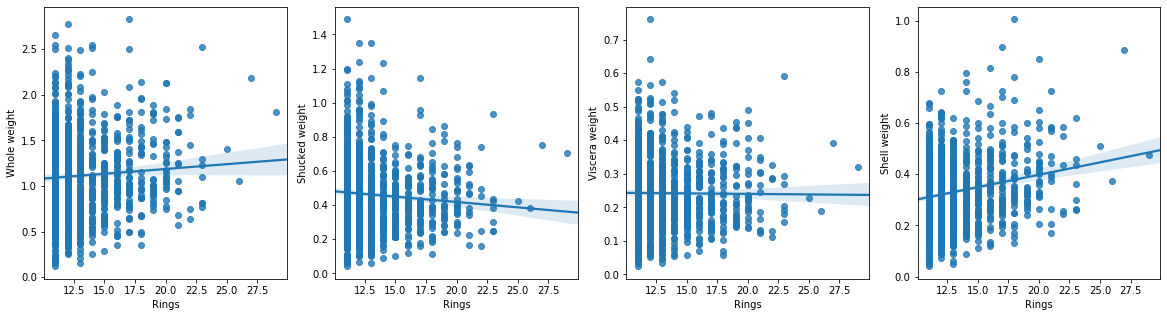

In [17]:
rows = 1
cols = 4
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in weight_att:
    i += 1
    plt.subplot(rows, cols, i)
    sns.regplot(x = old_abalone['Rings'], y = old_abalone[var])

This condition also can be seen on the regression plot above. The older the abalone, the more diverse their amount of rings. The stable condition is up to 10 rings which like 11.5 years old for them. After this age, its growth is affected by external condition (environtment, location, etc).

## 4. Sex

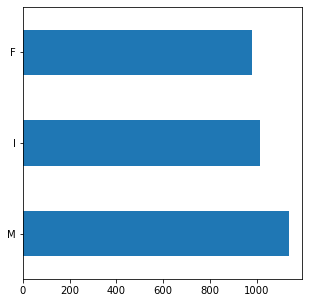

In [18]:
plt.figure(figsize=(5, 5))
_ = abalone_data['Sex'].value_counts().plot(kind='barh')

The dataset seems balanced as the amount from each category of sex have small difference.

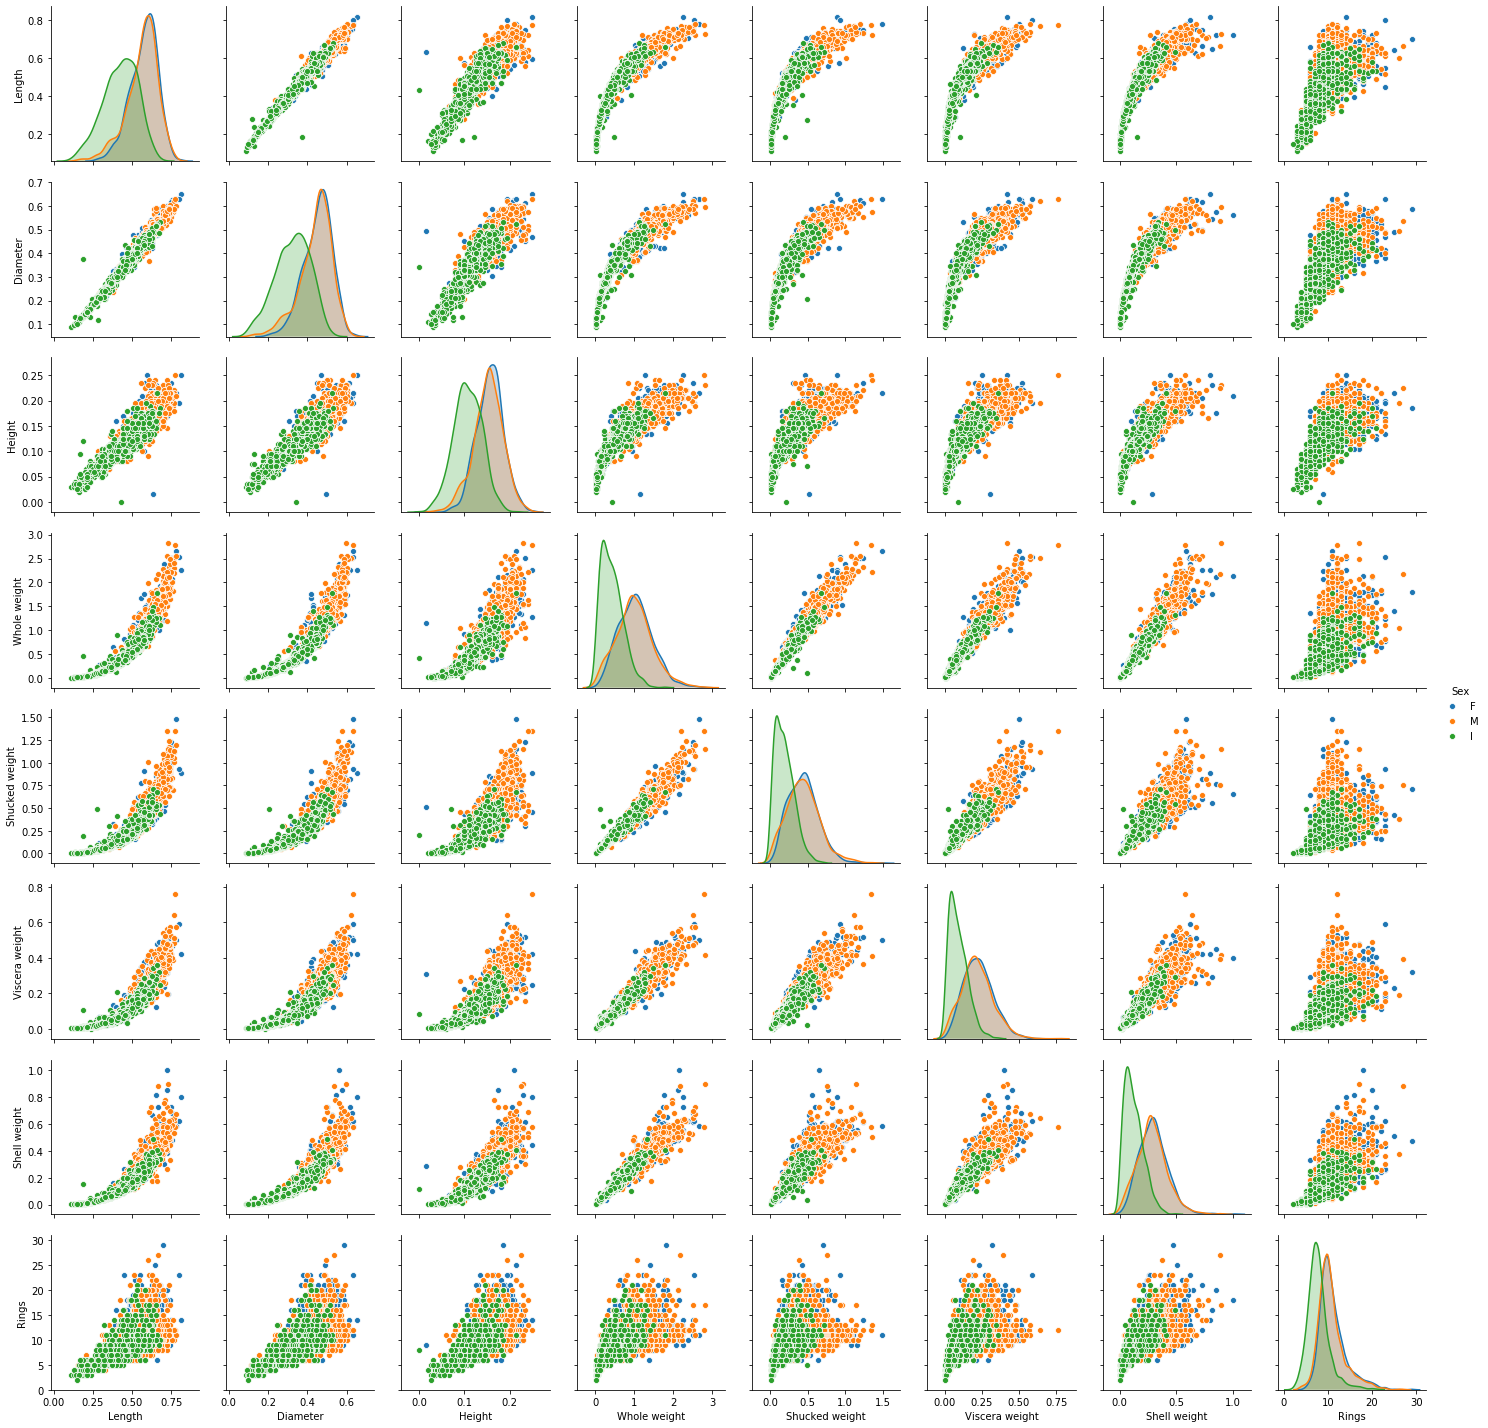

In [19]:
_ = sns.pairplot(abalone_data, hue='Sex')

## Checking influence of Sex on other attributes

In [20]:
abalone_data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

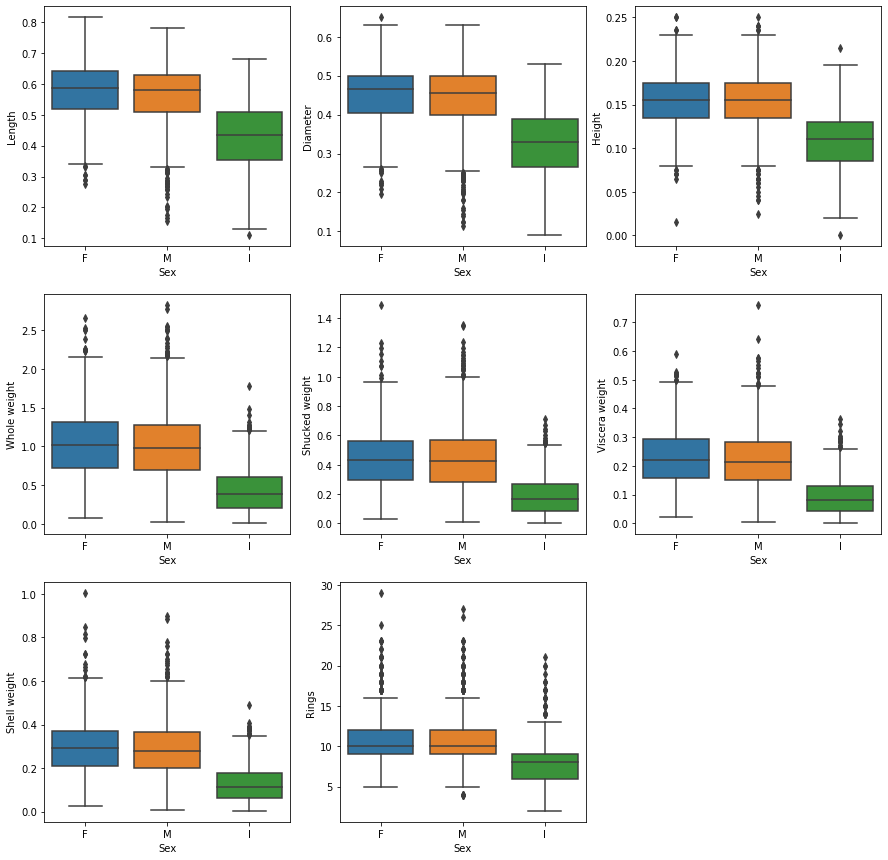

In [21]:
num_col = [col for col in abalone_data.columns if abalone_data[col].dtypes != 'object']

rows = 3
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in num_col:
    i += 1
    plt.subplot(rows, cols, i)
    _ = sns.boxplot(x = abalone_data['Sex'], y = abalone_data[var])

The distribution is similar for female and male abalone, while infant abalone have smaller mean/median than the other two. 
We can look further with comparing shell weight and height again but categorized by sex. These column was choosen because they represent column with biggest correlation to the rings column.

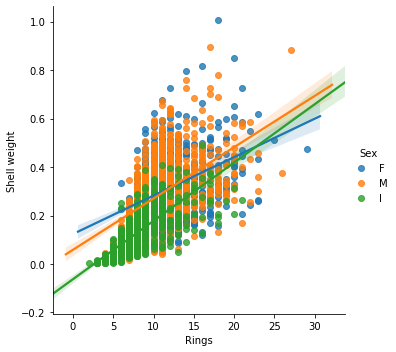

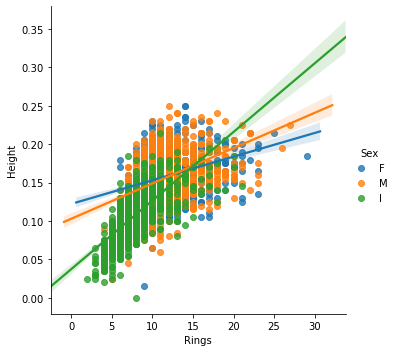

In [26]:
_ = sns.lmplot(x = 'Rings', y = 'Shell weight', data= abalone_data, hue= 'Sex')
_ = sns.lmplot(x = 'Rings', y = 'Height', data= abalone_data, hue= 'Sex')
sns.regplot()

From the plot above we can see that the infant category have better regression line (near 45 deg) as we know that the infant have lower rings value so the correlation is stronger. 

# Conclusion
There is no significant differences for weight and size attributes between male and female abalones, while infant abalones have lower size, weight, and rings amount. The size and weight of abalones varies according to age, this keep happen until they reach 10-15 rings (11.5 - 16.5 years), after this time their size and weight is not correlated with age anymore.